In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
import netCDF4
sys.path.append('/home/manu/TFG_repo/scripts')

In [24]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [25]:
time_series_path = data_dir / 'time_series' / 'processed' / 'AGL_1_37_56_cropped.nc'

In [26]:
with netCDF4.Dataset(time_series_path, 'r') as ds:
    lat = ds.variables['lat'][:]
    lon = ds.variables['lon'][:]
    temp = ds.variables['temp'][:]
    pres = ds.variables['pres'][:]
    date = ds.variables['date'][:]

In [27]:
df_fit = load_SHDR_fit('AGL_1_37_56_cropped_fit.csv')

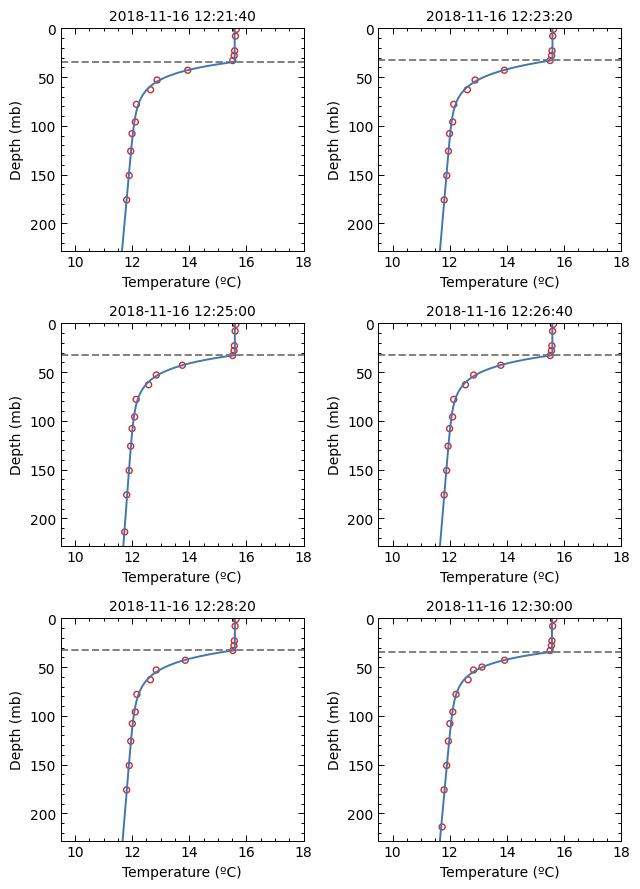

In [28]:
locs = np.arange(260, 380, 20, dtype='int')
plot_multiple_profiles(df_fit, temp, pres, locs)